In [1]:
#imports

import pandas as pd 
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import time
from datetime import datetime
from datetime import date
import calendar
import timeit
import math
plt.style.use('ggplot')
start_time = dt.datetime.now()
%matplotlib inline

In [2]:
%%time
data=pd.read_csv('card transactions.csv')
data.shape

CPU times: user 78.5 ms, sys: 16.7 ms, total: 95.2 ms
Wall time: 99.7 ms


(96753, 18)

In [3]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#cleaning data by dropping columns
data.dropna(how='all',axis=1,inplace=True)
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [67]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [68]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [69]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000


In [70]:
# Removing the outlier

data['Amount'].nlargest(2)

52714    3102045.53
47339      47900.00
Name: Amount, dtype: float64

In [71]:
len(data[data['Amount']>1000000])

1

In [72]:

data_filtered = data[data['Amount']<1000000]
data=data_filtered
data.count()

Recnum               96752
Cardnum              96752
Date                 96752
Merchnum             93378
Merch description    96752
Merch state          95558
Merch zip            92097
Transtype            96752
Amount               96752
Fraud                96752
dtype: int64

In [73]:
# Keeping only Transtype = p 

data_filtered2 = data[data['Transtype']=='P']
data=data_filtered2
data.count()

Recnum               96397
Cardnum              96397
Date                 96397
Merchnum             93199
Merch description    96397
Merch state          95377
Merch zip            92097
Transtype            96397
Amount               96397
Fraud                96397
dtype: int64

In [74]:
# Imputing merch state 

data['Merch state'].isnull().sum()

1020

In [75]:
zip_state = {}
for index, zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items(): 
  if zip5 not in zip_state:
    zip_state[zip5] = data.loc[index, 'Merch state']

zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] ='CA'
zip_state['00680']= 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] ='PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'

In [76]:
merchnum_state= {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
  if merchnum not in merchnum_state:
    merchnum_state [merchnum]= data.loc[index, 'Merch state']


In [77]:
merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
  if merchdes not in merchdes_state:
    merchdes_state [merchdes] = data.loc[index, 'Merch state']

In [78]:
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state)) 
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/641192430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/641192430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/641192430.py:3: Setting

In [79]:
data['Merch state'] = data['Merch state'].mask (data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown') 
data['Merch state'] = data['Merch state'].mask (data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT',
'unknown')

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1566027572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].mask (data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1566027572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'] = data['Merch state'].mask (data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT',


In [80]:
data['Merch state'].isnull().sum()

317

In [81]:
states = ["AL", "AK", "AZ","AR", "CA","CO", "CT","DE","FL", "GA","HI","ID", "IL","IN","IA","KS","KY","LA", "ME","MD","MA", "MI", "MN", "MS","MO","MT","NE","Ny","NE","NJ","NM", "NY", "NC", "ND", "OH","OK","OR","PA","RI","Sc","SD","IN","TX", "UT", "VT","VA", "WA","WV","WI", "WY",'VI','PR', np.nan, 'unknown' ]

for index, state in data['Merch state'].items():
  if state not in states:
    data.loc[index, 'Merch state'] = 'foreign'

In [82]:
data['Merch state'].fillna('unknown', inplace=True)

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1044665337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'].fillna('unknown', inplace=True)


In [83]:
data['Merch state'].isnull().sum()

0

In [84]:
data['Merch state'].unique()

array(['foreign', 'MA', 'MD', 'OH', 'GA', 'IL', 'TX', 'WA', 'WI', 'NJ',
       'FL', 'NY', 'CA', 'MS', 'VA', 'MO', 'PA', 'NC', 'WV', 'CT', 'KS',
       'OR', 'MI', 'MN', 'KY', 'ME', 'CO', 'AK', 'IA', 'MT', 'OK',
       'unknown', 'RI', 'NE', 'AZ', 'NM', 'UT', 'ID', 'SD', 'AL', 'DE',
       'LA', 'IN', 'VT', 'ND', 'AR', 'HI', 'WY'], dtype=object)

In [85]:
# Imputing Merchnum 

data['Merchnum']=data['Merchnum'].replace({0:np.nan})

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1170896044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum']=data['Merchnum'].replace({0:np.nan})


In [86]:
data['Merchnum'].isnull().sum()

3198

In [87]:
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()] [data['Merchnum'].notnull()]['Merch description'].items():
  if pd.isnull(merchdes) == True:
    continue
  elif merchdes not in merchdes_merchnum:
    merchdes_merchnum[merchdes] = data.loc[index, 'Merchnum']

In [88]:
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/2620706319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))


In [89]:
data['Merchnum'].isnull().sum()

2038

In [90]:
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown') 
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT',
'unknown')

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1239878148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1239878148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT',


In [91]:
data['Merchnum'].isnull().sum()

1347

In [92]:
data.loc[data.Merchnum.isna(), 'Merch description'].nunique()

481

In [93]:
merchnum_create = {}
max_merchnum = pd.to_numeric(data.Merchnum, errors='coerce').max() 
for merch_desc in data.loc[data.Merchnum.isna(), 'Merch description'].unique():
  merchnum_create[merch_desc] = str(int(max_merchnum + 1))
  max_merchnum += 1

In [94]:
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchnum_create) )

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1465096031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchnum_create) )


In [95]:
# for i in data.columns:
#   print(i, data[i].isnul1().sum())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 10.1+ MB


In [96]:
data['Merchnum'].isnull().sum()

0

In [97]:
# Imputing zip

data['Merch zip'].isnull().sum()

4300

In [98]:
merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items(): 
  if merchnum not in merchnum_zip :
    merchnum_zip[merchnum] = data.loc[index, 'Merch zip']

In [99]:
merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items(): 
  if merchdes not in merchdes_zip:
    merchdes_zip[merchdes]=data.loc[index, 'Merch zip']

In [100]:
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip)) 
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/2895164077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/2895164077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))


In [101]:
data['Merch zip'].isnull().sum()

2658

In [102]:
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown') 
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT',
'unknown')

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/914902354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/914902354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT',


In [103]:
data['Merch zip'].fillna('unknown',inplace=True)
data['Merch zip'].isnull().sum

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1956064474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'].fillna('unknown',inplace=True)


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
96748    False
96749    False
96750    False
96751    False
96752    False
Name: Merch zip, Length: 96397, dtype: bool>

In [104]:
data['Merch zip'].isnull().sum()

0

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 10.1+ MB


In [106]:
data.isnull().sum()/len(data)*100

Recnum               0.0
Cardnum              0.0
Date                 0.0
Merchnum             0.0
Merch description    0.0
Merch state          0.0
Merch zip            0.0
Transtype            0.0
Amount               0.0
Fraud                0.0
dtype: float64

In [107]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,foreign,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0


In [108]:
#Day of Week Target Encoding
data['dow']=data.Date.apply(lambda x: calendar.day_name[x.weekday()])

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/548837697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dow']=data.Date.apply(lambda x: calendar.day_name[x.weekday()])


In [109]:
# Separate the OOT
train_test=data[data.Date<'2010-11-01']

In [110]:
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()

y_dow =  train_test.groupby("dow")['Fraud'].mean()

num = train_test.groupby('dow').size()

y_dow_smooth = y_avg + (y_dow-y_avg)/(1+ np.exp(-(num - nmid)/c))

data['Dow_Risk'] = data.dow.map(y_dow_smooth)

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1991196477.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dow_Risk'] = data.dow.map(y_dow_smooth)


In [111]:
y_dow=y_dow.reset_index()
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow']=pd.Categorical(y_dow['dow'],categories=cats,ordered=True)
y_dow=y_dow.sort_values('dow')
y_dow=y_dow.set_index('dow')

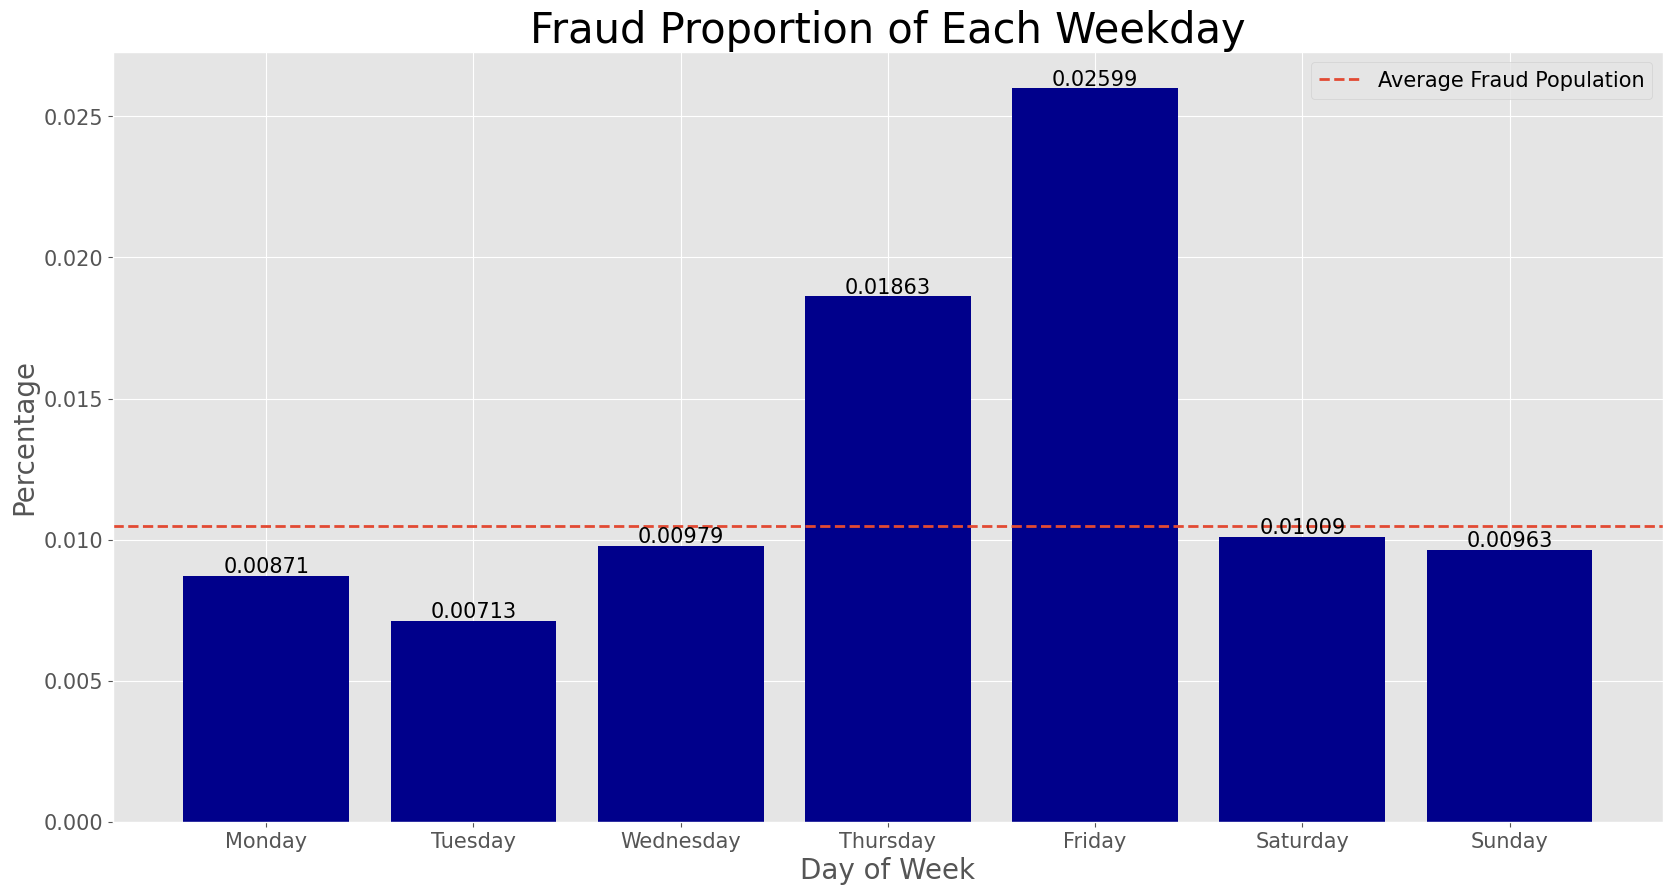

In [112]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize =(20,10))

plt.bar(data = y_dow, x = y_dow.index, height = 'Fraud', color = 'darkblue' )

# ax.set ylim(bottom= 0.013)

ax.axhline(y = y_avg, ls = '--', lw = 2, label="Average Fraud Population")

for i, v in enumerate(y_dow.index): 
    ax.text(v, y_dow.loc[v, 'Fraud']+ 0.0001, round(y_dow.loc[v, 'Fraud'],5), horizontalalignment = "center", fontsize=15)

plt.legend(['Average Fraud Population'], fontsize=15)

plt.xlabel("Day of Week", fontsize=20)

plt.ylabel("Percentage", fontsize=20) 
plt.xticks(fontsize=15)

plt.yticks(fontsize=15) 
plt.title("Fraud Proportion of Each Weekday", fontsize=30)
plt.show()

In [113]:
data['Month']=data['Date'].dt.month

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/770375944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=data['Date'].dt.month


In [114]:
### Convert card number to string to enable linkage
data['Cardnum']=data['Cardnum'].astype(str)
data['Merch zip']=data['Merch zip'].astype(str)
data['Month']=data['Month'].astype(str)

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/2136828861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cardnum']=data['Cardnum'].astype(str)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/2136828861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip']=data['Merch zip'].astype(str)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/2136828861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [115]:
# Make new entities for variables

data['card_merchnum']=data.Cardnum+data.Merchnum
data['card_state']=data.Cardnum+data['Merch state']
data['card_month']=data.Cardnum+data.Month
data['merchnum_month']=data.Merchnum+data.Month
data['card_dow']=data.Cardnum+data['dow']
data['Merchnum_state']=data.Merchnum+data['Merch state']
data['Merchnum_dow']=data.Merchnum+data['dow']
data['Merchdesc_state']=data['Merch description']+data['Merch state']
data['Merchnum_desc']=data.Merchnum+data['Merch description']
data['Merchnum_desc_state']=data.Merchnum+data['Merch description']+data['Merch state']
data['card_merchnum_month']=data.Cardnum+data.Merchnum+data.Month
data['card_merchnum_state_month']=data.Cardnum+data.Merchnum+data['Merch state']+data.Month
data['card_merchnum_state']=data.Cardnum+data.Merchnum +data['Merch state']

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/3208698578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['card_merchnum']=data.Cardnum+data.Merchnum
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/3208698578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['card_state']=data.Cardnum+data['Merch state']
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/3208698578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [116]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'dow',
       'Dow_Risk', 'Month', 'card_merchnum', 'card_state', 'card_month',
       'merchnum_month', 'card_dow', 'Merchnum_state', 'Merchnum_dow',
       'Merchdesc_state', 'Merchnum_desc', 'Merchnum_desc_state',
       'card_merchnum_month', 'card_merchnum_state_month',
       'card_merchnum_state'],
      dtype='object')

In [117]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merchnum_month,card_dow,Merchnum_state,Merchnum_dow,Merchdesc_state,Merchnum_desc,Merchnum_desc_state,card_merchnum_month,card_merchnum_state_month,card_merchnum_state
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,...,55090062962541,5142190439Friday,5509006296254foreign,5509006296254Friday,FEDEX SHP 12/23/09 AB#foreign,5509006296254FEDEX SHP 12/23/09 AB#,5509006296254FEDEX SHP 12/23/09 AB#foreign,514219043955090062962541,51421904395509006296254foreign1,51421904395509006296254foreign
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,610030263331,5142183973Friday,61003026333MA,61003026333Friday,SERVICE MERCHANDISE #81MA,61003026333SERVICE MERCHANDISE #81,61003026333SERVICE MERCHANDISE #81MA,5142183973610030263331,514218397361003026333MA1,514218397361003026333MA
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,45030829936001,5142131721Friday,4503082993600MD,4503082993600Friday,OFFICE DEPOT #191MD,4503082993600OFFICE DEPOT #191,4503082993600OFFICE DEPOT #191MD,514213172145030829936001,51421317214503082993600MD1,51421317214503082993600MD
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,foreign,38118.0,P,3.62,0,...,55090062962541,5142148452Friday,5509006296254foreign,5509006296254Friday,FEDEX SHP 12/28/09 AB#foreign,5509006296254FEDEX SHP 12/28/09 AB#,5509006296254FEDEX SHP 12/28/09 AB#foreign,514214845255090062962541,51421484525509006296254foreign1,51421484525509006296254foreign
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,...,55090062962541,5142190439Friday,5509006296254foreign,5509006296254Friday,FEDEX SHP 12/23/09 AB#foreign,5509006296254FEDEX SHP 12/23/09 AB#,5509006296254FEDEX SHP 12/23/09 AB#foreign,514219043955090062962541,51421904395509006296254foreign1,51421904395509006296254foreign


In [118]:
entities=list(data.iloc[:,np.r_[1,3,4,5,12:26]].columns)

In [119]:
entities

['Cardnum',
 'Merchnum',
 'Merch description',
 'Merch state',
 'Month',
 'card_merchnum',
 'card_state',
 'card_month',
 'merchnum_month',
 'card_dow',
 'Merchnum_state',
 'Merchnum_dow',
 'Merchdesc_state',
 'Merchnum_desc',
 'Merchnum_desc_state',
 'card_merchnum_month',
 'card_merchnum_state_month',
 'card_merchnum_state']

# Creating Variables

In [120]:
data1=data.copy()
final=data.copy()
data1['check_date']=data1.Date
data1['check_record']=data1.Recnum
final.shape

(96397, 26)

## Velocity/counts and days since

In [121]:
# begin=time.time()
# ds_cols = ['Cardnum','Merchnum','card_merch','card_state','card_zip','merchnum_merchstate','merchnum_zip']
# for i in ds_cols:
#     st=time.time()
#     df_1=df[['Recnum','Date',i]]
#     df_r=df[['check_record','check_date',i]]
#     temp=pd.merge(df_1,df_r,left_on=i,right_on=i)
    
#     #day since
#     day_since_df=temp[temp.Recnum>temp.check_record][['Recnum','Date','check_date']]\
#     .groupby('Recnum')[['Date','check_date']].last()
#     mapper=(day_since_df.Date-day_since_df.check_date).dt.days
#     vars[i+'_day_since']=vars.Recnum.map(mapper)
#     vars[i+'_day_since'].fillna(365,inplace=True)
#     print(f'\n{i}_day_since --->Done')

In [122]:
start = timeit.default_timer()
for entity in entities:    
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')
    st = timeit.default_timer()    
    ## Day-since variables:   
    data_l = data1[['Recnum', 'Date', entity]]
    data_r = data1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(data_l,data_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30]:       
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]       
        col_name = entity + '_count_' + str(time)    
        mapper2 = temp2.groupby('Recnum')[entity].count()      
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')       
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]       
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')

print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))




Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Cardnum amount variables over past 0 ---> Done
Cardnum_count_1 ---> Done
Cardnum amount variables over past 1 ---> Done
Cardnum_count_3 ---> Done
Cardnum amount variables over past 3 ---> Done
Cardnum_count_7 ---> Done
Cardnum amount variables over past 7 ---> Done
Cardnum_count_14 ---> Done
Cardnum amount variables over past 14 ---> Done
Cardnum_count_30 ---> Done
Cardnum amount variables over past 30 ---> Done
Run time for the last entity ----------------- 3.618323124999989s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Merchnum amount variables over past 0 ---> Done
Merchnum_count_1 ---> Done
Merchnum amount variables over past 1 ---> Done
Merchnum_count_3 ---> Done
Merchnum amount variables over past 3 ---> Done
Merchnum_count_7 ---> Done
Merchnum amount variables over past 7 ---> Done
Merchnum_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:29:

Merchnum amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())


Merchnum_count_30 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

Merchnum amount variables over past 30 ---> Done
Run time for the last entity ----------------- 19.617855084000013s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)



Merch description_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch description_count_0 ---> Done
Merch description amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch description_count_1 ---> Done
Merch description amount variables over past 1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch description_count_3 ---> Done
Merch description amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch description_count_7 ---> Done
Merch description amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch description_count_14 ---> Done
Merch description amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch description_count_30 ---> Done
Merch description amount variables over past 30 ---> Done
Run time for the last entity ----------------- 3.919712167s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)



Merch state_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch state_count_0 ---> Done
Merch state amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch state_count_1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:29:

Merch state amount variables over past 1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merch state_count_3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

Merch state amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())


Merch state_count_7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

Merch state amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)


Merch state_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Merch state amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)


Merch state_count_30 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Merch state amount variables over past 30 ---> Done
Run time for the last entity ----------------- 210.66733487499997s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)



Month_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())


Month_count_0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

Month amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)


Month_count_1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Month amount variables over past 1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)


Month_count_3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Month amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)


Month_count_7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Month amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)


Month_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Month amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)


Month_count_30 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Month amount variables over past 30 ---> Done
Run time for the last entity ----------------- 619.603758958s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)



card_merchnum_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_merchnum_count_0 ---> Done
card_merchnum amount variables over past 0 ---> Done
card_merchnum_count_1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:29:

card_merchnum amount variables over past 1 ---> Done
card_merchnum_count_3 ---> Done
card_merchnum amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_merchnum_count_7 ---> Done
card_merchnum amount variables over past 7 ---> Done
card_merchnum_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

card_merchnum amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_merchnum_count_30 ---> Done
card_merchnum amount variables over past 30 ---> Done
Run time for the last entity ----------------- 8.63876970800004s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram


card_state_day_since ---> Done
card_state_count_0 ---> Done
card_state amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_state_count_1 ---> Done
card_state amount variables over past 1 ---> Done
card_state_count_3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

card_state amount variables over past 3 ---> Done
card_state_count_7 ---> Done
card_state amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_state_count_14 ---> Done
card_state amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_state_count_30 ---> Done
card_state amount variables over past 30 ---> Done
Run time for the last entity ----------------- 1.6400346249999984s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram


card_month_day_since ---> Done
card_month_count_0 ---> Done
card_month amount variables over past 0 ---> Done
card_month_count_1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:29:

card_month amount variables over past 1 ---> Done
card_month_count_3 ---> Done
card_month amount variables over past 3 ---> Done
card_month_count_7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

card_month amount variables over past 7 ---> Done
card_month_count_14 ---> Done
card_month amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

card_month_count_30 ---> Done
card_month amount variables over past 30 ---> Done
Run time for the last entity ----------------- 1.0922731670000303s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:


merchnum_month_day_since ---> Done
merchnum_month_count_0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

merchnum_month amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

merchnum_month_count_1 ---> Done
merchnum_month amount variables over past 1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

merchnum_month_count_3 ---> Done
merchnum_month amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

merchnum_month_count_7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:29:

merchnum_month amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

merchnum_month_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

merchnum_month amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

merchnum_month_count_30 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

merchnum_month amount variables over past 30 ---> Done
Run time for the last entity ----------------- 4.435916792000057s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram


card_dow_day_since ---> Done
card_dow_count_0 ---> Done
card_dow amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_dow_count_1 ---> Done
card_dow amount variables over past 1 ---> Done
card_dow_count_3 ---> Done
card_dow amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

card_dow_count_7 ---> Done
card_dow amount variables over past 7 ---> Done
card_dow_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

card_dow amount variables over past 14 ---> Done
card_dow_count_30 ---> Done
card_dow amount variables over past 30 ---> Done
Run time for the last entity ----------------- 1.1513587090000783s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)



Merchnum_state_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_state_count_0 ---> Done
Merchnum_state amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_state_count_1 ---> Done
Merchnum_state amount variables over past 1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_state_count_3 ---> Done
Merchnum_state amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_state_count_7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

Merchnum_state amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_state_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

Merchnum_state amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())


Merchnum_state_count_30 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

Merchnum_state amount variables over past 30 ---> Done
Run time for the last entity ----------------- 16.919613292000008s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)



Merchnum_dow_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_dow_count_0 ---> Done
Merchnum_dow amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_dow_count_1 ---> Done
Merchnum_dow amount variables over past 1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_dow_count_3 ---> Done
Merchnum_dow amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_dow_count_7 ---> Done
Merchnum_dow amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_dow_count_14 ---> Done
Merchnum_dow amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_dow_count_30 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:29:

Merchnum_dow amount variables over past 30 ---> Done
Run time for the last entity ----------------- 4.097287625000035s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)



Merchdesc_state_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchdesc_state_count_0 ---> Done
Merchdesc_state amount variables over past 0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchdesc_state_count_1 ---> Done
Merchdesc_state amount variables over past 1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchdesc_state_count_3 ---> Done
Merchdesc_state amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchdesc_state_count_7 ---> Done
Merchdesc_state amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchdesc_state_count_14 ---> Done
Merchdesc_state amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchdesc_state_count_30 ---> Done
Merchdesc_state amount variables over past 30 ---> Done
Run time for the last entity ----------------- 3.5047407080000994s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)



Merchnum_desc_day_since ---> Done
Merchnum_desc_count_0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

Merchnum_desc amount variables over past 0 ---> Done
Merchnum_desc_count_1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc amount variables over past 1 ---> Done
Merchnum_desc_count_3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_count_7 ---> Done
Merchnum_desc amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_count_14 ---> Done
Merchnum_desc amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_count_30 ---> Done
Merchnum_desc amount variables over past 30 ---> Done
Run time for the last entity ----------------- 3.05664995799998s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram


Merchnum_desc_state_day_since ---> Done
Merchnum_desc_state_count_0 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

Merchnum_desc_state amount variables over past 0 ---> Done
Merchnum_desc_state_count_1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_state amount variables over past 1 ---> Done
Merchnum_desc_state_count_3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_state amount variables over past 3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_state_count_7 ---> Done
Merchnum_desc_state amount variables over past 7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_state_count_14 ---> Done
Merchnum_desc_state amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

Merchnum_desc_state_count_30 ---> Done
Merchnum_desc_state amount variables over past 30 ---> Done
Run time for the last entity ----------------- 3.051581959000032s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram


card_merchnum_month_day_since ---> Done
card_merchnum_month_count_0 ---> Done
card_merchnum_month amount variables over past 0 ---> Done
card_merchnum_month_count_1 ---> Done
card_merchnum_month amount variables over past 1 ---> Done
card_merchnum_month_count_3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: Per

card_merchnum_month amount variables over past 3 ---> Done
card_merchnum_month_count_7 ---> Done
card_merchnum_month amount variables over past 7 ---> Done
card_merchnum_month_count_14 ---> Done
card_merchnum_month amount variables over past 14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

card_merchnum_month_count_30 ---> Done
card_merchnum_month amount variables over past 30 ---> Done
Run time for the last entity ----------------- 0.7257860419999815s

card_merchnum_state_month_day_since ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

card_merchnum_state_month_count_0 ---> Done
card_merchnum_state_month amount variables over past 0 ---> Done
card_merchnum_state_month_count_1 ---> Done
card_merchnum_state_month amount variables over past 1 ---> Done
card_merchnum_state_month_count_3 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

card_merchnum_state_month amount variables over past 3 ---> Done
card_merchnum_state_month_count_7 ---> Done
card_merchnum_state_month amount variables over past 7 ---> Done
card_merchnum_state_month_count_14 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28:

card_merchnum_state_month amount variables over past 14 ---> Done
card_merchnum_state_month_count_30 ---> Done
card_merchnum_state_month amount variables over past 30 ---> Done
Run time for the last entity ----------------- 0.6709210000001349s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_day_since'] = final.Recnum.map(mapper)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram


card_merchnum_state_day_since ---> Done
card_merchnum_state_count_0 ---> Done
card_merchnum_state amount variables over past 0 ---> Done
card_merchnum_state_count_1 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:29:

card_merchnum_state amount variables over past 1 ---> Done
card_merchnum_state_count_3 ---> Done
card_merchnum_state amount variables over past 3 ---> Done
card_merchnum_state_count_7 ---> Done


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:27: P

card_merchnum_state amount variables over past 7 ---> Done
card_merchnum_state_count_14 ---> Done
card_merchnum_state amount variables over past 14 ---> Done
card_merchnum_state_count_30 ---> Done
card_merchnum_state amount variables over past 30 ---> Done
Total run time: 15.123914871533334mins


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name] = final.Recnum.map(mapper2)
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/219860616.py:25: PerformanceWarning: DataFrame is highly fragmented.  Th

In [123]:
final.shape

(96397, 1016)

In [124]:
data.shape

(96397, 26)

**NEW VARIABLES**

**1. To capture Unusual transaction amounts, concatenation of cardnum with amount entities**

In [133]:
# Amount - statistics per cardnum to capture unusal transaction amounts 

maximum_value = data.groupby("Cardnum").max()['Amount']

minimum_value = data.groupby("Cardnum").min()['Amount']

median_amount = data.groupby("Cardnum").median()['Amount']

mean_amount = data.groupby("Cardnum").mean()['Amount']

l = []
for i in data.index:
  median = median_amount.loc[data['Cardnum'][i]]
  value = ((data['Amount'][i] - median) / median) * 100 
  l.append(value)


data['Median_Diff_Cardnum'] = l

l = []
for i in data.index:
  maximum = maximum_value.loc[data['Cardnum'][i]]
  l.append(maximum)

data["Max_Cardnum"] = l

l = []
for i in data.index:
  minimum = minimum_value.loc[data['Cardnum'][i]]
  l.append(minimum)

data["Min_Cardnum"] = l

l = []
for i in data.index:
  mean = mean_amount.loc[data['Cardnum'][i]]
  value = ((data['Amount'][i] - mean) / mean) * 100 
  l.append(value)

data['Mean_Diff_Cardnum'] = l

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/373991939.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_amount = data.groupby("Cardnum").median()['Amount']
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/373991939.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_amount = data.groupby("Cardnum").mean()['Amount']
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/373991939.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

**New Variables**\
**2. Combination of entities to check the frequency of the cardnumbers with the days since the cardnumber has been used, along with the frequency and the merchant number.
This essentially tells us if there have been a lot of transactions happening at a particular merchant in a short       span of time**

In [138]:
for time in [0,1,3,7,14,30]:
   
    final['Cardnum' + '_day_since_merchnum' + '_avg_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_avg_' + str(time) + '_merchnum']
    final['Cardnum' + '_day_since_merchnum' + '_max_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_max_' + str(time) + '_merchnum']
    final['Cardnum' + '_day_since_merchnum' +  '_med_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_med_' + str(time) + '_merchnum']
    final['Cardnum' + '_day_since_merchnum' + '_total_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_total_' + str(time) + '_merchnum']
    final['Cardnum' + '_day_since_merchnum' + '_actual/avg_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_actual/avg_' + str(time) + '_merchnum']
    final['Cardnum' + '_day_since_merchnum' + '_actual/max_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_actual/max_' + str(time) + '_merchnum']
    final['Cardnum' + '_day_since_merchnum' + '_actual/med_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_actual/med_' + str(time) + '_merchnum']
    final['Cardnum' + '_day_since_merchnum' + '_actual/toal_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_actual/toal_' + str(time) + '_merchnum']
    
    

/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1754028423.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final['Cardnum' + '_day_since_merchnum' + '_max_' + str(time) + '_merchnum'] = final['Cardnum' + '_day_since_merchnum'] + final['Cardnum' + '_max_' + str(time) + '_merchnum']
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/1754028423.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final['Cardnum' + '_day_since_merchnum' +  '_med_' + str(time) + '_merchnum'] = final['Cardnum' + '_day

In [130]:
start = timeit.default_timer()
# velocity change variables
for ent in entities:
    for d in ['0', '1']:
        for dd in ['3','7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] =\
            final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)
            
print('run time: {}s'.format(timeit.default_timer() - start))


run time: 0.10792558299999655s


/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/4053462765.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[ent + '_count_' + d + '_by_' + dd] =\
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/4053462765.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[ent + '_count_' + d + '_by_' + dd] =\
/var/folders/ll/h_rnbgns62bcj0skpd2j0ktr0000gp/T/ipykernel_38628/4053462765.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [139]:
final.to_csv('final_before_B.csv')

In [140]:
# Benfords Law - Variables 

bf = data.copy()
bf['amount_100'] = (bf['Amount'] * 100).astype(str)
bf['first_digit'] = bf['amount_100'].str[0]
dropfedex = bf[bf['Merch description'].str.contains('FEDEX')]
droplist=dropfedex.index.tolist()
bfl= bf.drop(droplist)
bfl['bin']= bfl['first_digit'].apply(lambda x: "low" if x == "1" else ("low" if x == "2" else "high"))



In [141]:
card_bf = bfl.groupby(['Cardnum', 'bin']).agg({'bin': ['count']}).reset_index()
card_bf.columns=['Cardnum', 'bin', 'count']
card_bf = card_bf.pivot_table(index='Cardnum', columns='bin', values='count', aggfunc='sum').reset_index() 
card_bf.columns=['Cardnum', 'n_high', 'n_low']
card_bf = card_bf.fillna(1)


In [142]:

#calclating R, 1/R, U, n, t U_smoothed
import math
c=3
n_mid=15
card_bf['R'] = (1.096 * card_bf['n_low']/card_bf['n_high'])
card_bf['1/R'] = (1/card_bf['R'])
card_bf['U'] = list(map (lambda x, y : max(x,y), card_bf['R'], card_bf['1/R']))
card_bf['n'] = card_bf['n_high'] + card_bf['n_low']
card_bf['t'] = ((card_bf[ 'n' ]-n_mid)/c)
card_bf['U_smoothed']= list(map (lambda x, y : (1+ (x-1)/(1+ math.exp(-y))),card_bf['U'],card_bf['t'])) 
card_bf['U_smoothed'] = card_bf['U_smoothed']


In [143]:
merch_bf = bfl.groupby(['Merchnum', 'bin']).agg({'bin': ['count']}).reset_index()
merch_bf.columns=['Merchnum', 'bin', 'count']
merch_bf = merch_bf.pivot_table(index='Merchnum', columns='bin', values='count', aggfunc='sum').reset_index() 
merch_bf.columns=['Merchnum', 'n_high', 'n_low']
merch_bf = merch_bf.fillna(1)


In [144]:

#calclating R, 1/R, U, n, t U_smoothed
import math
c=3
n_mid=15
merch_bf['R'] = (1.096 * merch_bf['n_low']/merch_bf['n_high'])
merch_bf['1/R'] = (1/merch_bf['R'])
merch_bf['U'] = list(map (lambda x, y : max(x,y), merch_bf['R'], merch_bf['1/R']))
merch_bf['n'] = merch_bf['n_high'] + merch_bf['n_low']
merch_bf['t'] = ((merch_bf[ 'n' ]-n_mid)/c)
merch_bf['U_smoothed']= list(map (lambda x, y : (1+ (x-1)/(1+ math.exp(-y))),merch_bf['U'],merch_bf['t'])) 
merch_bf['U_smoothed'] = merch_bf['U_smoothed']



In [145]:

card_bf['Cardnum']=card_bf['Cardnum'].apply(str)
merch_bf['Merchnum']=merch_bf['Merchnum'].apply(str)


In [146]:
card_bf.set_index('Cardnum', inplace=True)
card_Ustar = pd.DataFrame(card_bf['U_smoothed'])
card_Ustar.sort_values([ 'U_smoothed'], ascending = False).head(3)



,U_smoothed
Cardnum,
5142253356,13.371199
5142299705,9.027976
5142197563,8.150852


In [147]:
merch_bf.set_index('Merchnum', inplace=True) 
merch_Ustar = pd.DataFrame (merch_bf [ 'U_smoothed'])
merch_Ustar.sort_values (['U_smoothed'], ascending = False).head(3)


,U_smoothed
Merchnum,
991808369338,165.145985
8078200641472,64.663981
308904389335,48.357557


In [149]:
final = final.merge(card_Ustar, how = 'left', left_on='Cardnum', right_on=card_Ustar.index) 
final = final.rename(columns={'U_smoothed': 'U*_cardnum' })
final = final.merge(merch_Ustar, how = 'left', left_on='Merchnum', right_on=merch_Ustar.index) 
final.rename (columns={ 'U_smoothed': 'U*_merchnum'})


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Cardnum_day_since_merchnum_avg_30_merchnum,Cardnum_day_since_merchnum_max_30_merchnum,Cardnum_day_since_merchnum_med_30_merchnum,Cardnum_day_since_merchnum_total_30_merchnum,Cardnum_day_since_merchnum_actual/avg_30_merchnum,Cardnum_day_since_merchnum_actual/max_30_merchnum,Cardnum_day_since_merchnum_actual/med_30_merchnum,Cardnum_day_since_merchnum_actual/toal_30_merchnum,U*_cardnum,U*_merchnum
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,...,3.62,3.62,3.62,3.62,1.000000,1.000000,1.000000,1.000000,2.178008,NaN
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,31.42,31.42,31.42,31.42,1.000000,1.000000,1.000000,1.000000,1.604857,1.001244
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,178.49,178.49,178.49,178.49,1.000000,1.000000,1.000000,1.000000,2.368143,1.025818
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,foreign,38118.0,P,3.62,0,...,3.62,3.62,3.62,3.62,1.000000,1.000000,1.000000,1.000000,1.044105,NaN
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,...,3.62,3.62,3.62,7.24,1.000000,1.000000,1.000000,0.500000,2.178008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,...,448.79,448.79,448.79,448.79,365.000000,365.000000,365.000000,365.000000,1.002393,1.001244
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,...,370.30,610.85,370.30,729.60,11.330504,11.197966,11.330504,11.165252,1.137948,1.288057
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,...,727.56,727.56,727.56,727.56,365.000000,365.000000,365.000000,365.000000,1.201338,1.106055
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,...,941.21,2228.03,509.25,2771.63,28.406038,27.000000,30.556710,26.802013,1.499767,1.029441


In [150]:
print('duration: ',dt.datetime.now() - start_time)

duration:  1:11:51.563890


In [155]:
final.to_csv('final_after_B.csv')

In [152]:
data.to_csv('data_before_B.csv')

In [156]:
new_data_after = pd.read_csv('final_after_B.csv')
print(new_data_after.shape)
new_data_before = pd.read_csv('data_before_B.csv')
print(new_data_before.shape)

(96397, 1266)
(96397, 31)
